### About this file
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


#### Attributes

#### People

- `ID`: Customer's unique identifier
- `Year_Birth`: Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise
    
#### Products:

- `MntWines`: Amount spent on wine in last 2 years
- `MntFruits`: Amount spent on fruits in last 2 years
- `MntMeatProducts`: Amount spent on meat in last 2 years
- `MntFishProducts`: Amount spent on fish in last 2 years
- `MntSweetProducts`: Amount spent on sweets in last 2 years
- `MntGoldProds`: Amount spent on gold in last 2 years
    
#### Promotion:

- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Location:

- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month

In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt

import seaborn as sn

In [2]:
url = "https://raw.githubusercontent.com/DonAvery/customer-marketing-project/main/Data/marketing_campaign.csv"
df = pd.read_csv(url, sep = ';')

## EDA

Transposing the dataframe allows us to easily see the all the columns.

In [3]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04,2014-03-08,2013-08-21,2014-02-10,2014-01-19
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


I don't think the "ID" column adds to our dataset since we have the "Dt_Customer" column, lets use that as the index.

I want to get all the text the same so I will lowercase all the text.

In [4]:
df.columns = df.columns.str.lower()

In [5]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

A quick analysis of the data shows us there are some null values, count column shows 2240 entries in all columns, except "income".

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
year_birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
mntwines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
mntfruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
mntmeatproducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
mntfishproducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


z_costcontact and z_revenue both have the same value for all records, lets drop those.

In [7]:
del df['z_revenue']
del df['z_costcontact']

In [8]:
df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
response                0
dtype: int64

In [9]:
df["income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

In [10]:
df['income'].value_counts(bins = 6, sort = False)

(1065.063, 112552.667]      2207
(112552.667, 223375.333]       8
(223375.333, 334198.0]         0
(334198.0, 445020.667]         0
(445020.667, 555843.333]       0
(555843.333, 666666.0]         1
Name: income, dtype: int64

I want to delete these 9 records as they will skew the data.

In [11]:
np.count_nonzero(df.income > 110000.00)

9

In [12]:
df.drop(df[df['income'] >= 111000].index, inplace = True)

Now that we eliminated the 9 rows of outlier incomes we can fill in the rest of the nan incomes with the mean

In [13]:
df['income'].fillna(int(df['income'].mean()), inplace=True)

In [14]:
df.isnull().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
response               0
dtype: int64

In [15]:
df.dtypes

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
response                 int64
dtype: object

We can see, when calling `dytpes` that we have three non numerical columns, `dt_customer` is a date column, we will worry about that later. `education` and `marital_status` are also both of the object data type. Let's get some unique information from these.

In [16]:
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

## Visualize

Let's visualize some of this data now.

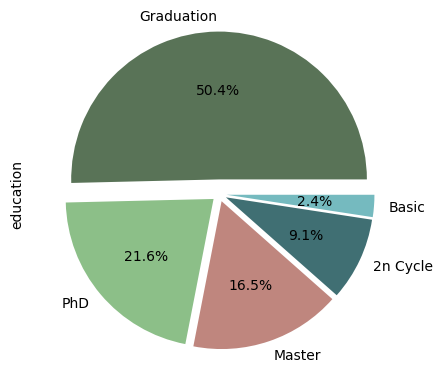

In [18]:
colors = ['#597357', '#8CBF88', '#BF867E', '#406F73', '#75BABF']
explode = [0.1,0.05,0.05,0.05,0.05]

df['education'].value_counts().plot(kind = 'pie', autopct='%.1f%%', colors=colors, explode=explode)
plt.show()

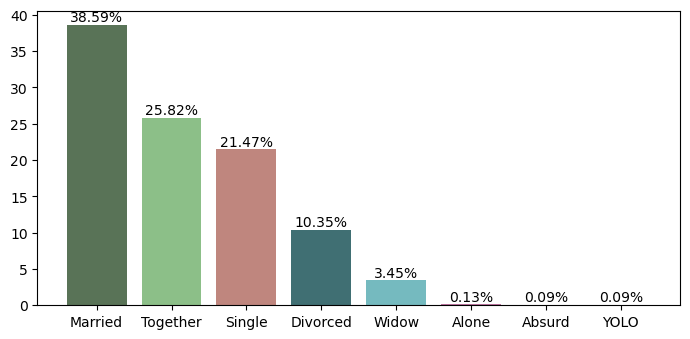

In [19]:
colors = ['#597357', '#8CBF88', '#BF867E', '#406F73', '#75BABF', '#BF75A1', '#6BB9BF', '#95BF91']

percentages = round(((df['marital_status'].value_counts() / df['marital_status'].shape[0]) * 100), 2)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
labels = df['marital_status'].unique()

plt.figure()

p1 = plt.bar(percentages.index, percentages, color=colors)

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=10)

plt.show()

In [20]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response'],
      dtype='object')

<AxesSubplot: >

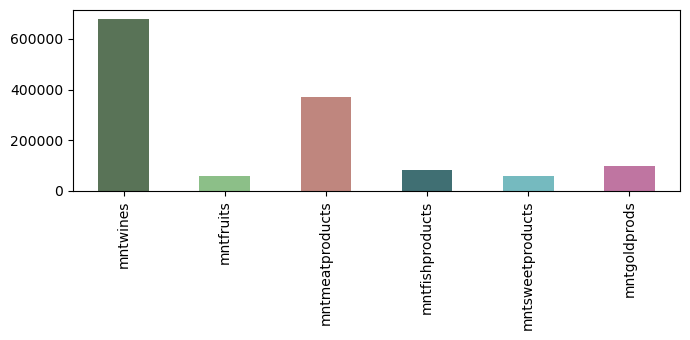

In [21]:
colors = ['#597357', '#8CBF88', '#BF867E', '#406F73', '#75BABF', '#BF75A1', '#6BB9BF', '#95BF91']

cols = ['mntwines',
            'mntfruits',
            'mntmeatproducts',
            'mntfishproducts',
            'mntsweetproducts',
            'mntgoldprods']

df[cols].sum().plot.bar(color=colors)

In [22]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response'],
      dtype='object')

<AxesSubplot: >

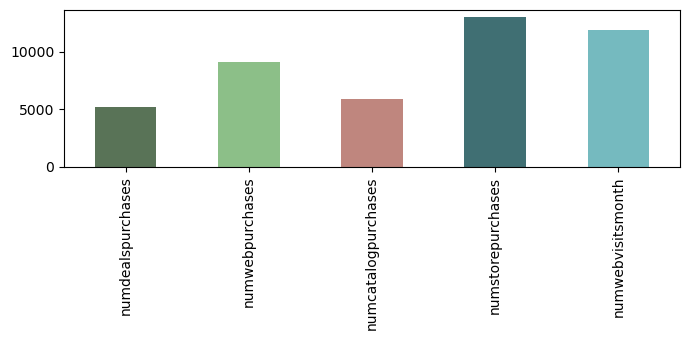

In [23]:
colors = ['#597357', '#8CBF88', '#BF867E', '#406F73', '#75BABF', '#BF75A1', '#6BB9BF', '#95BF91']

cols = ['numdealspurchases',
        'numwebpurchases',
       'numcatalogpurchases',
        'numstorepurchases',
        'numwebvisitsmonth']

df[cols].sum().plot.bar(color=colors)

<AxesSubplot: >

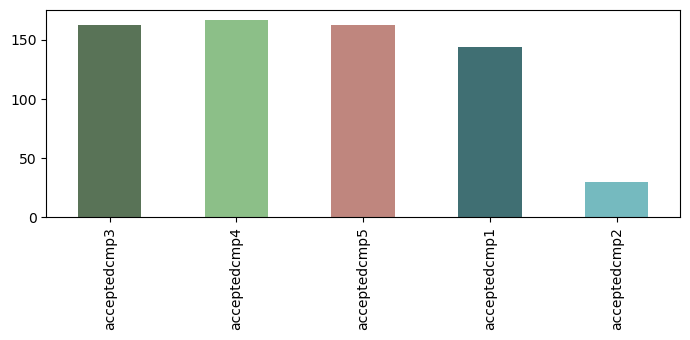

In [24]:
colors = ['#597357', '#8CBF88', '#BF867E', '#406F73', '#75BABF', '#BF75A1', '#6BB9BF', '#95BF91']

cols = ['acceptedcmp3',
        'acceptedcmp4',
        'acceptedcmp5',
        'acceptedcmp1',
       'acceptedcmp2']

df[cols].sum().plot.bar(color=colors)

In [25]:
df['complain'][df['complain'] > 0].count()

21

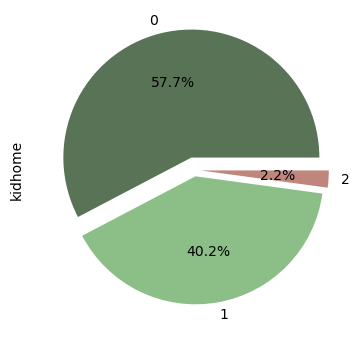

In [26]:
colors = ['#597357', '#8CBF88', '#BF867E', '#406F73', '#75BABF']
explode = [0.1,0.05,0.05]

df['kidhome'].value_counts().plot(kind = 'pie', autopct='%.1f%%', colors=colors, explode=explode)
plt.show()

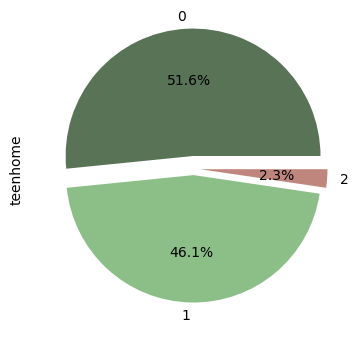

In [27]:
colors = ['#597357', '#8CBF88', '#BF867E', '#406F73', '#75BABF']
explode = [0.1,0.05,0.05]

df['teenhome'].value_counts().plot(kind = 'pie', autopct='%.1f%%', colors=colors, explode=explode)
plt.show()

array([[<AxesSubplot: title={'center': 'income'}>]], dtype=object)

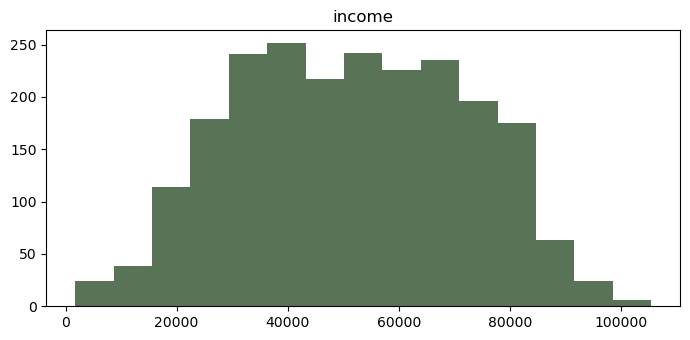

In [28]:
df.hist(column='income', bins=15, color = '#597357', grid=False)

array([[<AxesSubplot: title={'center': 'recency'}>]], dtype=object)

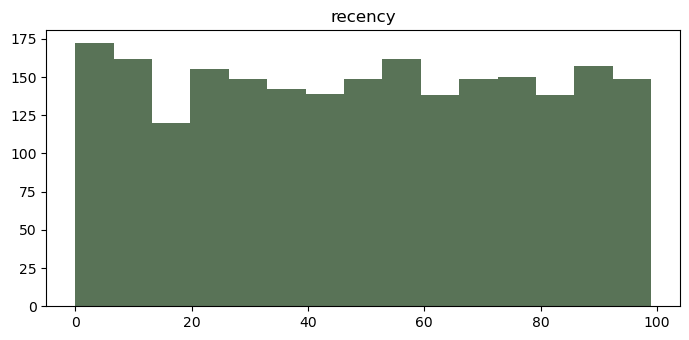

In [29]:
df.hist(column='recency', bins=15, color = '#597357', grid=False)

Promotion:
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [30]:
df['numdealspurchases'].sum()

5174

In [31]:
campaigns = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']

In [32]:
for n in campaigns:
    print(n, df[n].sum())

acceptedcmp1 144
acceptedcmp2 30
acceptedcmp3 163
acceptedcmp4 167
acceptedcmp5 163


In [33]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"])

In [34]:
df["dt_customer"].max()

Timestamp('2014-06-29 00:00:00')

In [35]:
df['response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: response, Length: 2231, dtype: int64

In [36]:
df[categorical].nunique()

education           5
marital_status      8
dt_customer       663
dtype: int64

I will create a new feature against the date 2014:
- `cust_age`

In [37]:
df['cust_age'] = 2015 - df['year_birth']

In [38]:
df['cust_age'].head()

0    58
1    61
2    50
3    31
4    34
Name: cust_age, dtype: int64

In [39]:
df.drop(columns='year_birth')

,id,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,cust_age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,58
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,61
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,50
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,31
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,4,5,0,0,0,0,0,0,0,48
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,5,7,0,0,0,1,0,0,0,69
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,13,6,0,1,0,0,0,0,0,34
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,10,3,0,0,0,0,0,0,0,59


In [41]:
df.to_csv('cleaned-marketing-campaign.csv', index = False)